```python
Data Hackerman Final Project
By Richard Adeyeye
18-April-2023
```

In [1]:
import pandas as pd
import requests
import json
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
import folium


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Versions check

In [2]:
pip show pip

Name: pip
Version: 23.0.1
Summary: The PyPA recommended tool for installing Python packages.
Home-page: https://pip.pypa.io/
Author: The pip developers
Author-email: distutils-sig@python.org
License: MIT
Location: c:\users\all4u\anaconda3\envs\finalprojenv\lib\site-packages
Requires: 
Required-by: fastai, fastcore, openmim
Note: you may need to restart the kernel to use updated packages.


### 1. File type manipulation and formatting

In [3]:
# Main working directory 
main_working_folder = os.getcwd()

In [4]:
# Data folder directory
data_folder = "data"

In [5]:
# Combining the paths
main_path = os.path.join(main_working_folder, data_folder)

In [6]:
# Getting the files list
files_list = os.listdir(main_path)

In [7]:
files_list

['csv_file.csv', 'json_file.json', 'project_data.csv', 'txt_file.txt']

In [8]:
# Reading in csv file
csv_data = pd.read_csv(os.path.join(main_path, files_list[0]))

In [9]:
csv_data.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566,False,Can't believe I'm missing Love Island 😩,GB,twitter,1,51.57,0.46


In [10]:
# Reading in text file
# book_data = pd.read_csv(os.path.join(main_path, files_list[2]))
text_data = pd.read_csv(os.path.join(main_path, files_list[2]), sep=',', header=0)

In [11]:
text_data.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46


In [12]:
# json_data = pd.read_json(os.path.join(main_path, files_list[1]))

with open(os.path.join(main_path, files_list[1])) as f:
    json_data = json.load(f)
json_data_df = pd.json_normalize(json_data)

In [13]:
json_data_df.head(1)

,author.properties.friends,author.properties.verified,author.properties.status_count,location.longitude,location.country,location.latitude,content.body,properties.sentiment,properties.platform
0,150,False,583,-1.45,GB,53.38,To everyone tryin to snapchat me fuck off I'm ugly,-1,twitter


### Combine the DataFrames

In [14]:
len(csv_data)

1000

In [15]:
len(text_data)

2999

In [16]:
len(json_data_df)

1000

In [17]:
csv_txt_data = pd.concat([csv_data, text_data])

In [18]:
len(csv_txt_data)

3999

In [19]:
csv_txt_json_data = pd.concat([csv_txt_data, json_data_df])

In [20]:
len(csv_txt_json_data)

4999

In [21]:
csv_txt_json_data.head(1)

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566.00,False,Can't believe I'm missing Love Island 😩,GB,twitter,1.00,51.57,0.46


### 2. Data exploration

In [22]:
csv_txt_json_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       4999 non-null   int64  
 1   author.properties.status_count  4999 non-null   float64
 2   author.properties.verified      4999 non-null   bool   
 3   content.body                    4999 non-null   object 
 4   location.country                4999 non-null   object 
 5   properties.platform             4998 non-null   object 
 6   properties.sentiment            4999 non-null   float64
 7   location.latitude               4999 non-null   float64
 8   location.longitude              4999 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 356.4+ KB


In [23]:
csv_txt_json_data["properties.sentiment"].unique()

array([ 1., -1.,  0.])

In [24]:
# Removing the null, 'NaN' data from the "properties.sentiment" column
updated_data = csv_txt_json_data[csv_txt_json_data["properties.sentiment"].notnull()]

In [25]:
#csv_txt_json_data['author.properties.friends'] = csv_txt_json_data['author.properties.friends'].astype(int)
#csv_txt_json_data['author.properties.friends'] = pd.to_numeric(csv_txt_json_data['author.properties.friends'],errors = 'coerce')
updated_data['properties.sentiment'].unique()

array([ 1., -1.,  0.])

In [26]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       4999 non-null   int64  
 1   author.properties.status_count  4999 non-null   float64
 2   author.properties.verified      4999 non-null   bool   
 3   content.body                    4999 non-null   object 
 4   location.country                4999 non-null   object 
 5   properties.platform             4998 non-null   object 
 6   properties.sentiment            4999 non-null   float64
 7   location.latitude               4999 non-null   float64
 8   location.longitude              4999 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 356.4+ KB


In [27]:
updated_data.describe().T

,count,mean,std,min,25%,50%,75%,max
author.properties.friends,4999.00,1196.88,6636.27,0.00,255.00,522.00,1070.00,333028.00
author.properties.status_count,4999.00,34685.68,125255.42,2.00,3495.50,11617.00,30790.00,1702464.00
properties.sentiment,4999.00,-0.26,0.78,-1.00,-1.00,0.00,0.00,1.00
location.latitude,4999.00,52.76,1.66,49.19,51.50,52.20,53.69,58.17
location.longitude,4999.00,-1.60,1.64,-7.82,-2.67,-1.40,-0.18,1.40


In [28]:
# save the output 
updated_data.to_csv(os.path.join(main_path, 'project_data.csv'), index=False)

#### Friends statistics

In [29]:
friends_df = updated_data['author.properties.friends'].value_counts().rename_axis('friends').to_frame('counts')
friends_df.head(5)

,counts
friends,
195,59
2457,53
0,28
190,25
11,24


#### Countries statistics

In [30]:
countries_df = updated_data['location.country'].value_counts().rename_axis('country code').to_frame('counts')

In [31]:
countries_df

,counts
country code,
GB,4986
GG,9
IM,2
JE,2


#### Sentiments count

In [32]:
sentiments_df = updated_data['properties.sentiment'].value_counts().rename_axis('sentiment').to_frame('counts')
sentiments_df

,counts
sentiment,
-1.00,2343
0.00,1634
1.00,1022


In [33]:
updated_data.shape

(4999, 9)

#### Platforms count

In [34]:
platforms_df = updated_data['properties.platform'].value_counts().rename_axis('platform').to_frame('counts')
platforms_df

,counts
platform,
twitter,4998


### Country vs Sentiment

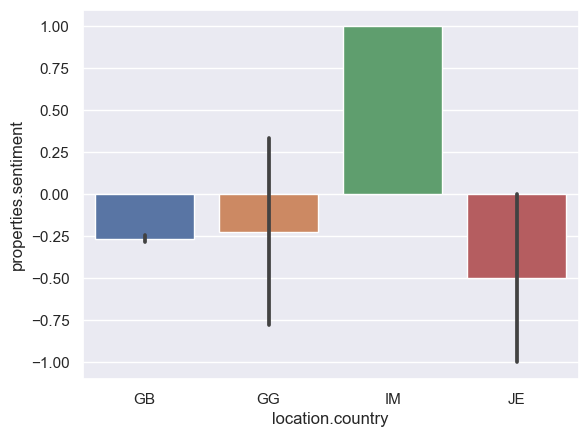

<Figure size 640x480 with 0 Axes>

In [35]:
sns.set_theme()
sns.barplot(data=updated_data, x='location.country', y='properties.sentiment')
plt.show()
plt.savefig("images\sentiment.png")

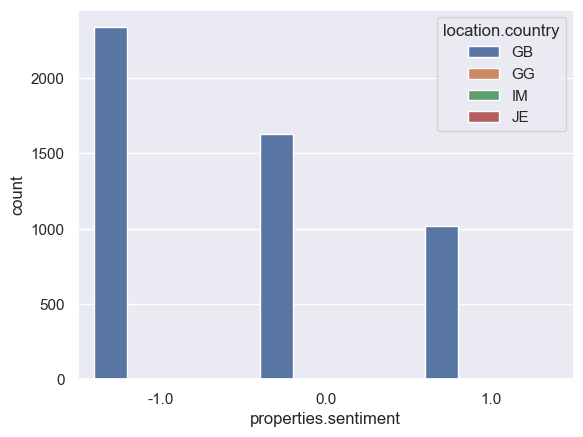

<Figure size 640x480 with 0 Axes>

In [36]:
# count plot properties.sentiment and author.properties.verified
sns.countplot(x='properties.sentiment',hue='location.country',data=updated_data)
plt.show()
plt.savefig("images\properties.png")

In [37]:
# get the location where sentiments on properties were sampled
location_data = updated_data[['location.latitude','location.longitude']]
area_map =  folium.Map(location=[58.17,1.40], zoom_start=5)
heat_map_data = [[row['location.latitude'],row['location.longitude']] for index, row in location_data.iterrows()]

In [38]:
from folium.plugins import HeatMap
# display map
HeatMap(heat_map_data, radius=5).add_to(area_map)

In [39]:
#display the map
area_map